# Benchmark on pKa calculation

## Collect all calculated pKa values
The working directories are kept in "book". The state "c" means completed calculations.

In [1]:
from pkanalysis import *

calc_pkas = read_calculated_pkas()
expr_pkas = read_experiment_pkas()
matched_pKas = match_pka(expr_pkas, calc_pkas)

## Fit the overall pKa

In [15]:
x = np.array([p[1] for p in matched_pKas])
y = np.array([p[2] for p in matched_pKas])
delta = np.abs(x-y)
m, b = np.polyfit(x, y, 1)
rmsd = np.sqrt(np.mean((x-y)**2))
within_2 = 0
within_1 = 0
n = len(matched_pKas)
for d in delta:
    if d <= 2.0:
        within_2 += 1
        if d <= 1.0:
            within_1 += 1

In [17]:
print("y=%.3fx + %.3f" %(m, b))
print("RMSD between expr and calc = %.3f" % rmsd)
print("%.1f%% within 2 pH unit" % (within_2/n*100))
print("%.1f%% within 1 pH unit" % (within_1/n*100))
print("Total points: %d" % n)

y=0.917x + 0.693
RMSD between expr and calc = 1.297
93.5% within 2 pH unit
73.3% within 1 pH unit
Total points: 1032


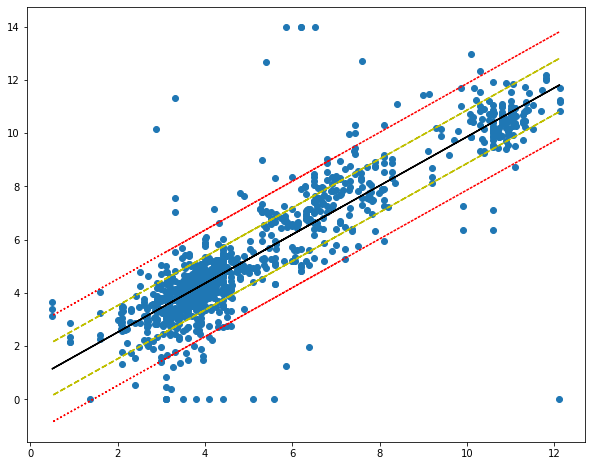

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-', color="k")
plt.plot(x, b+1 + m * x, '--', color="y")
plt.plot(x, b-1 + m * x, '--', color="y")
plt.plot(x, b+2 + m * x, ':', color="r")
plt.plot(x, b-2 + m * x, ':', color="r")
plt.show()

## Residue analysis

In [5]:
residues_stat = {}
for pka in matched_pKas:
    resname = pka[0][5:8]
    expr_pka = pka[1]
    calc_pka = pka[2]
    if resname in residues_stat:
        residues_stat[resname].append(pka)
    else:
        residues_stat[resname] = [pka]

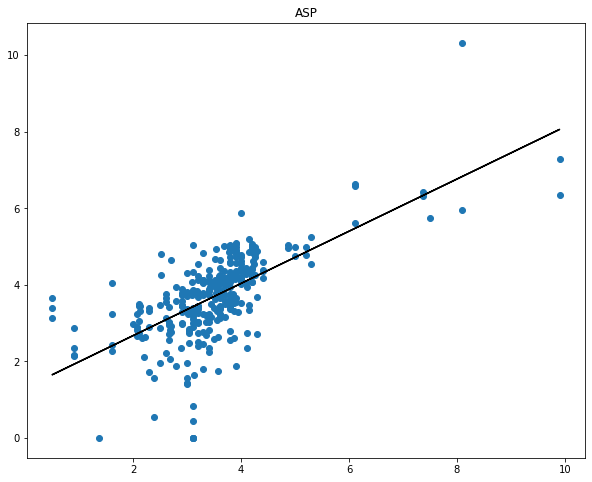

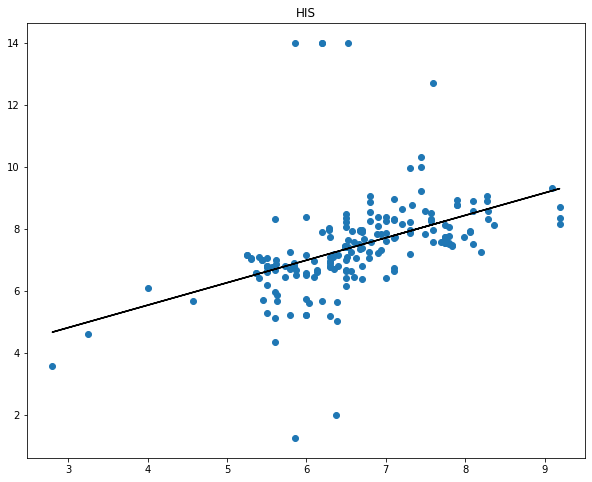

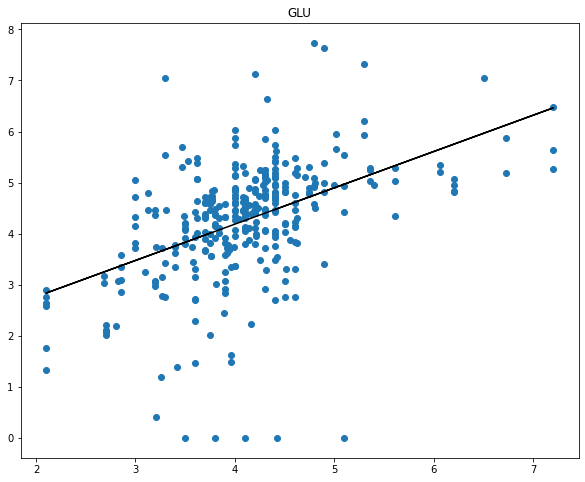

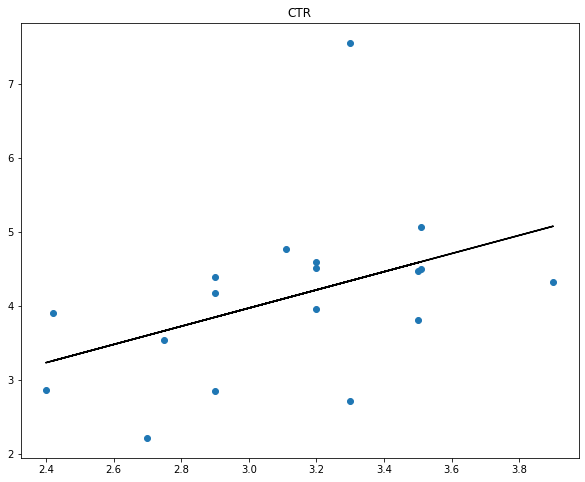

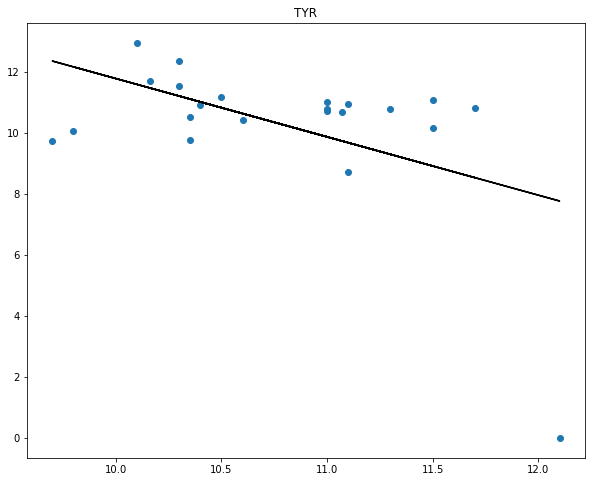

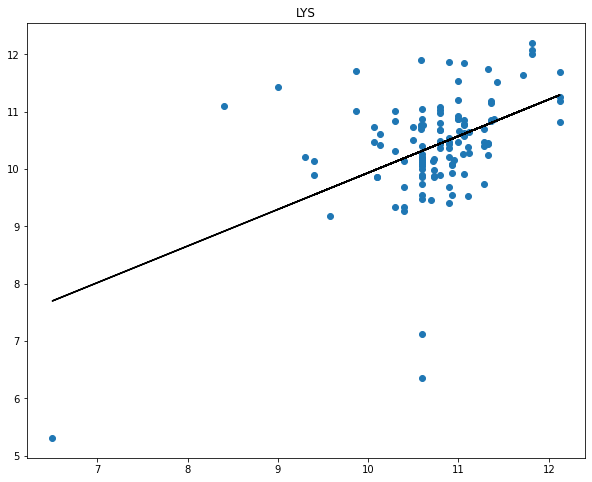

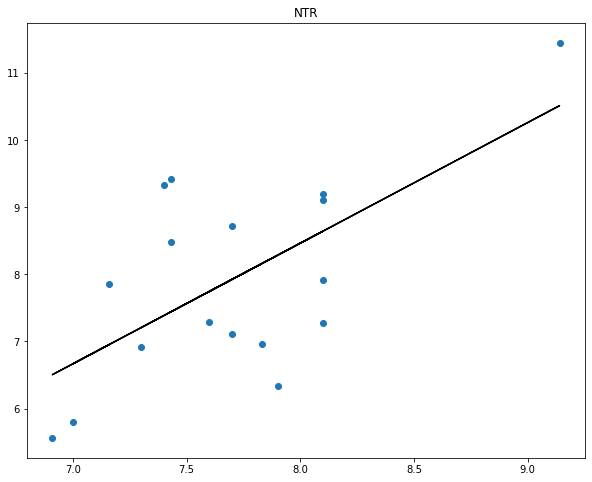

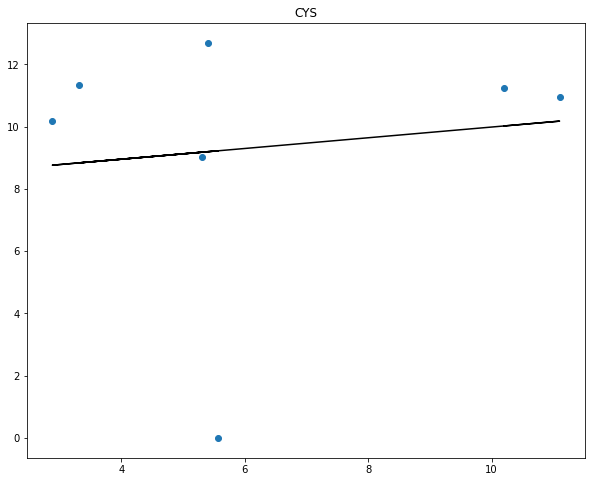

In [6]:
for key in residues_stat:
    x = np.array([p[1] for p in residues_stat[key]])
    y = np.array([p[2] for p in residues_stat[key]])
    m, b = np.polyfit(x, y, 1)
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, "o")
    plt.plot(x, m * x + b, '-', color="k")
    plt.title(key)
    plt.show()

## Outlier case analysis

In [7]:
for pka in matched_pKas:
    id = pka[0]
    if abs(pka[2]) < 0.01 or abs(pka[2] - 14.0) < 0.01:
        print(id, "%.3f %.3f" % (pka[1], pka[2]))
    elif abs(pka[1] - pka[2]) > 2.0:
        print(id, "%.3f %.3f" % (pka[1], pka[2]))

1A2P/ASP-C0075_ 3.100 0.000
1A6K/HIS+A0024_ 6.200 14.000
1A6M/HIS+A0024_ 6.200 14.000
1B2X/ASP-A0075_ 3.100 0.000
1BEG/ASP-A0030_ 2.510 4.804
1BHC/LYS+J0015_ 10.600 7.119
1BHC/LYS+J0046_ 10.600 6.362
1BHC/GLU-J0049_ 3.800 0.000
1BNI/ASP-B0075_ 3.100 0.000
1BNJ/ASP-A0075_ 3.100 0.000
1BNR/GLU-A0060_ 3.000 5.044
1BNR/ASP-A0075_ 3.100 0.832
1BVI/GLU-B0058_ 3.960 1.488
1BVI/ASP-B0076_ 0.500 3.657
1BVI/GLU-B0102_ 5.300 7.326
1CDC/GLU-A0029_ 4.420 0.000
1DE3/ASP-A0075_ 3.900 1.877
1DE3/HIS+A0082_ 7.300 9.955
1DE3/GLU-A0096_ 5.100 0.000
1LYS/ASP-A0048_ 1.600 4.041
1QH7/HIS+A0011_ 6.520 14.000
1QH7/HIS+A0060_ 4.010 6.092
1QH7/GLU-A0178_ 4.100 0.000
1RDD/GLU-A0129_ 3.600 1.470
1RGG/GLU-A0074_ 3.470 5.706
2IGH/GLU-A0061_ 4.200 7.136
2SNI/GLU-I0060_ 3.500 0.000
3EGF/HIS+A0022_ 6.800 8.865
3RN3/ASP-A0121_ 3.100 0.457
3RN3/HIS+A0048_ 6.000 8.368
1P5F/CYS-A0106_ 5.400 12.692
1EH6/CYS-A0145_ 5.300 9.007
1PPN/CYS-A0025_ 3.320 11.324
2HNP/CYS-A0215_ 5.570 0.000
1PPO/CYS-A0025_ 2.880 10.165
4PTI/TYR-A00

### 1. Case study - not enough conformers?
1A2P/ASP-C0075_ 3.100 0.000
```
mfe.py -p 0 ASP-C0075_ -c 0.1
Residue ASP-C0075_ pKa/Em=Titration of residue ASP-C0075_ out of range
=================================
Terms          pH     meV    Kcal
---------------------------------
vdw0        -0.01   -0.37   -0.01
vdw1        -0.05   -2.70   -0.06
tors        -0.25  -14.29   -0.34
ebkb        -1.71  -99.37   -2.34
dsol         3.50  203.05    4.77
offset      -0.62  -36.17   -0.85
pH&pK0       4.75  275.70    6.48
Eh&Em0       0.00    0.00    0.00
-TS          0.37   21.30    0.50
residues    -7.17 -416.40   -9.79
*********************************
TOTAL       -1.19  -69.23   -1.63  sum_crg
*********************************
ASNC0005_   -0.10   -5.82   -0.14    0.00
ASNC0023_   -0.11   -6.40   -0.15    0.00
TYRC0024_   -0.22  -12.69   -0.30   -0.00
LYSC0027_   -0.54  -31.50   -0.74    1.00
SERC0050_    0.22   12.57    0.30    0.00
ASPC0054_    0.18   10.41    0.24   -0.02
ARGC0072_   -0.13   -7.81   -0.18    1.00
GLUC0073_    0.22   12.75    0.30   -0.02
TYRC0078_    0.13    7.35    0.17   -0.00
ARGC0083_   -4.09 -237.60   -5.58    1.00
ASNC0084_    0.50   29.01    0.68    0.00
ARGC0087_   -2.48 -143.90   -3.38    1.00
HISC0102_   -0.31  -17.93   -0.42    1.00
=================================
```

ARG83 and ARG87 have strong interaction.

Since 1A2P has 3 chains, let's calculate chain A to see if we get different results. 

We get similar results on chain A:
```
 mfe.py -p 0 ASP-A0075_ -c 0.1
Residue ASP-A0075_ pKa/Em=Titration of residue ASP-A0075_ out of range
=================================
Terms          pH     meV    Kcal
---------------------------------
vdw0        -0.01   -0.36   -0.01
vdw1        -0.01   -0.34   -0.01
tors        -0.25  -14.47   -0.34
ebkb        -1.75 -101.67   -2.39
dsol         3.48  201.88    4.74
offset      -0.62  -36.17   -0.85
pH&pK0       4.75  275.70    6.48
Eh&Em0       0.00    0.00    0.00
-TS          0.29   16.91    0.40
residues    -7.67 -445.03  -10.46
*********************************
TOTAL       -1.78 -103.54   -2.43  sum_crg
*********************************
TYRA0024_   -0.22  -12.70   -0.30   -0.00
LYSA0027_   -0.82  -47.40   -1.11    1.00
SERA0050_   -0.12   -6.77   -0.16    0.00
ASPA0054_    0.22   12.99    0.31   -0.02
ARGA0072_   -0.13   -7.79   -0.18    1.00
GLUA0073_    0.20   11.55    0.27   -0.02
TYRA0078_    0.12    7.18    0.17   -0.00
ARGA0083_   -3.99 -231.64   -5.44    1.00
ASNA0084_    0.50   28.90    0.68    0.00
ARGA0087_   -2.49 -144.58   -3.40    1.00
HISA0102_   -0.34  -19.45   -0.46    1.00
=================================
```


Now let's allow side chain motion on ASP75, ARG83 and ARG87.
```
(mcce) jmao@Jupiter:~/projects/benchmark/E08_L1/1A2P_localrot$ mfe.py ASP-C0075_ -p 0 -c 0.1
Residue ASP-C0075_ pKa/Em=Titration of residue ASP-C0075_ out of range
=================================
Terms          pH     meV    Kcal
---------------------------------
vdw0        -0.01   -0.55   -0.01
vdw1         0.00    0.28    0.01
tors        -0.25  -14.43   -0.34
ebkb        -1.76 -102.28   -2.40
dsol         3.43  199.10    4.68
offset      -0.62  -36.17   -0.85
pH&pK0       4.75  275.70    6.48
Eh&Em0       0.00    0.00    0.00
-TS          0.27   15.83    0.37
residues    -6.46 -374.76   -8.81
*********************************
TOTAL       -0.64  -37.29   -0.88  sum_crg
*********************************
ASNC0005_   -0.10   -5.86   -0.14    0.00
ASNC0023_   -0.11   -6.34   -0.15    0.00
TYRC0024_   -0.21  -12.31   -0.29   -0.00
LYSC0027_   -0.46  -26.68   -0.63    1.00
SERC0050_   -0.15   -8.43   -0.20    0.00
ASPC0054_    0.17    9.93    0.23   -0.02
ARGC0072_   -0.13   -7.32   -0.17    1.00
GLUC0073_    0.12    7.08    0.17   -0.02
TYRC0078_    0.10    5.83    0.14   -0.00
ARGC0083_   -2.94 -170.89   -4.02    1.00
ASNC0084_    0.49   28.35    0.67    0.00
ARGC0087_   -2.39 -138.55   -3.26    1.00
HISC0102_   -0.30  -17.36   -0.41    1.00
=================================
```

ARG83 interaction is reduced by 1 pH unit, in the right direction, but not enough.


## Do adding local rotamers help?

| PDB | Residue    | Expr | Original | Alt Chain/pdb | local rotamer | Remark      |
|---  |  ---       | ---  | ---      | ---           | ---           | ---         |
|1A2P | ASP-C0075_ | 3.1  |  < 0     | B: < 0        | 0.3           | Asp8-Arg110-Asp12, Arg83-Asp75-Arg87 salt bridges for structure stability |
|1B2X | ASP-A0075_ | 3.1  |  < 0     | B: < 0        | 0.316         | Asp8-Arg110-Asp12, Arg83-Asp75-Arg87 salt bridges for structure stability |
|1BNI | ASP-A0075_ | 3.1  |  < 0     | < 0           | 1.711         | Asp8-Arg110-Asp12, Arg83-Asp75-Arg87 salt bridges for structure stability |
|1BNJ | ASP-A0075_ | 3.1  |  < 0     | < 0           | 0.868         | Asp8-Arg110-Asp12, Arg83-Asp75-Arg87 salt bridges for structure stability |
|1BNR | GLU-A0060_ | 3.0  | 5.041    | 10: 4.063     | 3.775         |
|1BNR | ASP-A0075_ | 3.1  | 0.836    | 0.916         | 2.993         | Asp8-Arg110-Asp12, Arg83-Asp75-Arg87 salt bridges for structure stability |
|1A6K | HIS+A0024_ | 6.2  |  < 0     | 1A6N:  <0     | < 0           | HIS24 - HIS119 clash |
|1A6M | HIS+A0024_ | 6.2  |  < 0     | 1A6N:  <0     | < 0           | HIS24 - HIS119 clash |
|1BEG | ASP-A0030_ | 2.51 | 4.819    | 10: 4.79      | 4.80          | No favarable interaction found |                     |
|1BHC | LYS+J0015_ | 10.6 | 7.103    | J: 9.31       |               | The complex made unfavorable dsolv for LYS |
|1BHC | LYS+J0046_ | 10.6 | 6.390    | J: 10.02      |               | The complex made unfavorable dsolv for LYS |
|1BHC | GLU-J0049_ | 3.8  | < 0      | J: 4.24       |               | The complex made GLU - ARG53 interaction too strong |
|1BVI | GLU-B0058_ | 3.96 | 1.488    | B: 0.688      | 4.035         | Use a single chain |
|1BVI | ASP-B0076_ | 0.5  | 3.657    | B: 3.638      | 4.166         | Use a single chain |
|1BVI | GLU-B0102_ | 5.3  | 7.326    | B: 6.112      | 5.648         | Use a single chain |
|1CDC | GLU-A0029_ | 4.42 | < 0      | B: 2.864      | 4.28          | Use a single chain |
|1DE3 | ASP-A0075  | 3.9  | 1.877    | 10: 2.516     | 1.849         |
|1DE3 | HIS+A0082_ | 7.3  | 9.926    | 10: 8.768     | 8.745         |                    |
|1DE3 | GLU-A0096_ | 5.1  | 0.43     | 10: 0.41      | 2.700         | multiple strong interactions |
|1LYS | ASP-A0048_ | 1.6  | 4.039    | B: 2.365      | 2.554         |                             |
|1QH7 | HIS+A0011_ | 6.52 | < 0      | B: < 0        | 4.841         | clash with LYS50            |
|1QH7 | HIS+A0060_ | 4.01 | 6.1      | B: 6.19       | 6.259         | ARG164 not strong enough    |
|1QH7 | GLU-A0178_ | 4.1  | < 0      | B: < 0        | < 0           | ARG49                       |
|1RDD | GLU-A0129_ | 3.6  | 1.481    | 3AA3: 2.212   | 2.356         | ARG27 HIS127 interaction    |
|1RGG | GLU-A0054_ | 3.42 | 1.381    | B: 3.116      | 3.037         |                             |
|1RGG | GLU-A0074_ | 3.47 | 5.674    | B: 5.433      | 5.466         | HIS53 interaction not strong enough |
|1RGG | NTR+A0001_ | 9.14 | 11.452   | B: 10.213     | 10.154        |                             |
|2IGH | GLU-A0061_ | 4.2  | 7.129    | 10: 5.298     | 5.498         | LYS15, LYS18, LYS36, CTR61  |
|2SNI | GLU-I0060_ | 3.5  | < 0      | I: 1.771      | 4.021         | ARG62, ARG65, ARG67 strong interaction |
|3EGF | HIS+A0022_ | 6.8  | 8.865    | 10: 6.618     |               |                    |
|3RN3 | ASP-A0121_ | 3.1  | 0.457    | 1RNC: 1.032   | 2.549         | LYS66 HIS119 overstabilized |
|3RN3 | HIS+A0048_ | 6.0  | 8.368    | 1RNC: 7.852   | 8.381         | ASP14 oversabilized |
|1P5F | CYS-A0106_ | 5.4  | 12.688   | 4RKW: 13.383  | 12.637        | GLU18 |
|1EH6 | CYS-A0145_ | 5.3  | 9.007    | 1QNT: 8.196   |               | ASN137, ARG147 |
|1PPN | CYS-A0025_ | 3.32 | 11.324   | 1PPD: 10.797  | 9.254         | LYS17, ARG83, LYS174 |
|2HNP | CYS-A0215_ | 5.57 | < 0      | 2HNQ: < 0     | < 0           | HIS214 ARG221 SER222 ARG257 | 
|1PPO | CYS-A0025_ | 2.88 | 10.165   | 1MEG: 11.978  | 9.141         | ARG17, ARG83, LYS178 |
|4PTI | TYR-A0035_ | 11.1 | 8.717    | 1BPI: 9.719   | 8.790         |                      |
|1YMB | HIS+A0119_ | 6.37 | 1.977    | Red: 2.032    | 6.239         | LYS16 LYS118         |
|1ERT | GLU-A0006_ | 4.8  | 7.734    | 1ERU: 7.633   | 5.267         | ASP61                |
|1ERT | ASP-A0026_ | 9.9  | 7.314    | 1ERU: 10.322  | 7.363         | GLU56                |
|1ERT | CYS-A0032_ | 6.3  | 10.424   | 1ERU: CYD     | 10.462        | CYS35                |
|1ERU | ASP-A0026_ | 8.1  | 10.322   | 1ERT: 7.734   | 8.890         |                      |  
|1ERU | GLU-A0006_ | 4.9  | 7.633    | 1ERT: 7.734   | 4.942         |                      |
|1YGW | HIS+A0040_ | 7.44 | 10.312   | 10: 10.287    | 7.960         | TYR38 GLU58          |
|1BI6 | GLU-L0005_ | 4.0  | 6.035    |               | 5.621         |                      |
|1BI6 | GLU-H0001_ | 3.3  | 5.553    |               | 4.868         |                      |
|1BI6 | GLU-H0002_ | 3.3  | 7.057    |               | 6.649         |                      |
|1EPI | HIS+A0022_ | 6.8  | 9.048    |               | 8.335         |                      |
|1STN | HIS+A0046_ | 5.86 | < 0      | 1KDB: 1.528   | 3.458         | LYS48 LYS49          |       
|1STN | GLU-A0043_ | 4.32 | 6.641    | 1KDB: 6.168   | 6.597         | ASP19 ASP21 GLU52    |
|1STN | GLU-A0075_ | 3.26 | 1.207    | 1KDB: 0.773   | 2.412         | LYS9 HIS121          |
|9RNT | ASP-A0076_ | 0.5  | 3.388    | 8RNT: 3.180   | 3.215         | ARG77                |               
|9RNT | GLU-A0058_ | 3.96 | 1.625    | 8RNT: 2.302   | 2.468         | HIS40 ARG77          |
|9RNT | HIS+A0040_ | 7.44 | 9.994    | 8RNT: 9.652   | 8.733         | GLU58                |
|1PPF | GLU-I0019_ | 3.21 | 0.405    | I: 3.298      |               |                      |
|2LZT | TYR-A0020_ | 10.3 | 12.350   | 1V7S: 11.425  | 11.522        | ARG21                |
|2LZT | TYR-A0053_ | 12.1 | > 14     | 1V7S: > 14    | > 14          | ASP66                |
|1DSB | CYS-A0030_ | 3.5  | > 0      | B: NA         |               | CYS30 - CYD33        |
|2TRX | CYS-A0032_ | 7.1  |          |               |               | CYD32 - CYD35        |
|2TRX | CYS-A0035_ | 9.9  |          |               |               | CYD32 - CYD35        | 
|2TRX | NTR+A0001_ | 7.4  | > 14.0   | Remove: 9.334 |               | VDW1 clash, remove cofactors   |
|1MEK | CYS-A0036_ | 4.5  |          |               |               | CYD36 - CYD39        |
|1PTD | HIS+A0032_ | 7.6  | 12.697   | 1PTG: 11.827  | 12.793        | ASP33 ASP67 ARG69 ASP198 LYS207 ASP274 |
|1MBC | HIS+A0097_ | 5.6  |          |               |               | HIL93-HEM-HIL97      |          
|1EX3 | ASP-A0102_ | 1.36 | < 0      | 6DI8.B: 1.813 |               |                      |
|1ANS | TYR-A0018_ | 10.1 | 12.961   | 10: 11.269    | 13.163        |                      |
|1ANS | CTR-A0027_ | 3.30 | 7.556    | 10: 4.447     | 7.344         |                      |
|2LZM | ASP-A0070_ | 0.5  | 3.158    | 1L14: 3.003   | 3.675         | HIS31                |
|1MUT | LYS+A0039_ | 8.4  | 11.093   | 10: 10.202    | 10.313        | GLU34                |
|1HRC | HIS+A0018_ | 2.5  |          |               |               | HIS18 HEM ligand     |
|1HRC | LYS+A0079_ | 9.0  | 11.430   | 6K9I: 11.349  | 10.386        | PAA PDD              |
|1EY0 | HIS+A0046_ | 5.86 | 1.244    | 1EYD: < 0     | 1.399         |                      |
|1TRS | ASP-A0026_ | 8.1  | 5.953    |               | 4.943         | LYS39 ASP56          |
|1TRW | ASP-A0026_ | 9.9  | 6.386    |               | 5.169         | LYS39 ASP56          |
|1B2V | HIS+A0032_ | 7.3  | > 14     |               |               | HIL32                |
|1B2V | HIS+A0083_ | 5.6  | 8.314    | 1DK0: 7.962   | 8.518         | TYR75 is a ligand so the charge is different, PAA PDD |
|1B2V | HIS+A0179_ | 7.1  | > 14     |               |               | Not in PDB           |


### Improvement fitting
Overall

Outliers





In [9]:
outliers = {}
class OUTLIER:
    def __init__(self):
        self.exp = 0.0
        self.ori = 0.0
        self.new = 0.0
        self.method = ""  # alt, rot, exc
    
for pka in matched_pKas:
    id = pka[0]
    if abs(pka[2]) < 0.01 or abs(pka[2] - 14.0)  < 0.01 or abs(pka[1] - pka[2]) > 2.0:
        value = OUTLIER()
        value.exp = pka[1]
        value.ori = pka[2]
        outliers[id] = value

# input the new values
#for key in outliers:
#    print(key, outliers[key].exp, outliers[key].ori)

outliers["1A2P/ASP-C0075_"].new = 0.3
outliers["1A2P/ASP-C0075_"].method = "rot"
outliers["1A6K/HIS+A0024_"].new = 0.0
outliers["1A6K/HIS+A0024_"].method = "rot"
outliers["1A6M/HIS+A0024_"].new = 0.0
outliers["1A6M/HIS+A0024_"].method = "rot"
outliers["1B2X/ASP-A0075_"].new = 0.316
outliers["1B2X/ASP-A0075_"].method = "rot"
outliers["1BEG/ASP-A0030_"].new = 4.8
outliers["1BEG/ASP-A0030_"].method = "rot"
outliers["1BHC/LYS+J0015_"].new = 9.31
outliers["1BHC/LYS+J0015_"].method = "alt"
outliers["1BHC/LYS+J0046_"].new = 10.02
outliers["1BHC/LYS+J0046_"].method = "alt"
outliers["1BHC/GLU-J0049_"].new = 4.24
outliers["1BHC/GLU-J0049_"].method = "alt"
outliers["1BNI/ASP-B0075_"].new = 1.711
outliers["1BNI/ASP-B0075_"].method = "rot"
outliers["1BNJ/ASP-A0075_"].new = 0.868
outliers["1BNJ/ASP-A0075_"].method = "rot"
outliers["1BNR/GLU-A0060_"].new = 3.775
outliers["1BNR/GLU-A0060_"].method = "rot"
outliers["1BNR/ASP-A0075_"].new = 2.993
outliers["1BNR/ASP-A0075_"].method = "rot"
outliers["1BVI/GLU-B0058_"].new = 4.035
outliers["1BVI/GLU-B0058_"].method = "rot"
outliers["1BVI/ASP-B0076_"].new = 4.166
outliers["1BVI/ASP-B0076_"].method = "rot"
outliers["1BVI/GLU-B0102_"].new = 5.648
outliers["1BVI/GLU-B0102_"].method = "rot"
outliers["1CDC/GLU-A0029_"].new = 4.28
outliers["1CDC/GLU-A0029_"].method = "rot"
outliers["1DE3/ASP-A0075_"].new = 2.516
outliers["1DE3/ASP-A0075_"].method = "alt"
outliers["1DE3/HIS+A0082_"].new = 8.768
outliers["1DE3/HIS+A0082_"].method = "alt"
outliers["1DE3/GLU-A0096_"].new = 2.7
outliers["1DE3/GLU-A0096_"].method = "rot"
outliers["1LYS/ASP-A0048_"].new = 2.554
outliers["1LYS/ASP-A0048_"].method = "rot"
outliers["1QH7/HIS+A0011_"].new = 4.841
outliers["1QH7/HIS+A0011_"].method = "rot"
outliers["1QH7/HIS+A0060_"].new = 6.259
outliers["1QH7/HIS+A0060_"].method = "rot"
outliers["1QH7/GLU-A0178_"].new = 0.0
outliers["1QH7/GLU-A0178_"].method = "rot"
outliers["1RDD/GLU-A0129_"].new = 2.356
outliers["1RDD/GLU-A0129_"].method = "rot"
outliers["1RGG/GLU-A0074_"].new = 5.466
outliers["1RGG/GLU-A0074_"].method = "rot"
outliers["2IGH/GLU-A0061_"].new = 5.498
outliers["2IGH/GLU-A0061_"].method = "rot"
outliers["2SNI/GLU-I0060_"].new = 4.201
outliers["2SNI/GLU-I0060_"].method = "rot"
outliers["3EGF/HIS+A0022_"].new = 6.618
outliers["3EGF/HIS+A0022_"].method = "alt"
outliers["3RN3/ASP-A0121_"].new = 2.549
outliers["3RN3/ASP-A0121_"].method = "rot"
outliers["3RN3/HIS+A0048_"].new = 8.381
outliers["3RN3/HIS+A0048_"].method = "rot"
outliers["1P5F/CYS-A0106_"].new = 12.637
outliers["1P5F/CYS-A0106_"].method = "rot"
outliers["1EH6/CYS-A0145_"].new =8.196
outliers["1EH6/CYS-A0145_"].method = "alt"
outliers["1PPN/CYS-A0025_"].new = 9.254
outliers["1PPN/CYS-A0025_"].method = "rot"
outliers["2HNP/CYS-A0215_"].new = 0
outliers["2HNP/CYS-A0215_"].method = "rot"
outliers["1PPO/CYS-A0025_"].new = 9.141
outliers["1PPO/CYS-A0025_"].method = "rot"
outliers["4PTI/TYR-A0035_"].new = 8.790
outliers["4PTI/TYR-A0035_"].method = "rot"
outliers["1RGG/GLU-A0054_"].new = 3.037
outliers["1RGG/GLU-A0054_"].method = "rot"
outliers["1RGG/NTR+A0001_"].new = 10.154
outliers["1RGG/NTR+A0001_"].method = "rot"
outliers["1YMB/HIS+A0119_"].new =6.239
outliers["1YMB/HIS+A0119_"].method = "rot"
outliers["1ERT/GLU-A0006_"].new = 5.267
outliers["1ERT/GLU-A0006_"].method = "rot"
outliers["1ERT/ASP-A0026_"].new = 7.363
outliers["1ERT/ASP-A0026_"].method = "rot"
# outliers["1ERT/CYS-A0032_"].new = 10.462
# outliers["1ERT/CYS-A0032_"].method = "exc"
outliers["1YGW/HIS+A0040_"].new = 7.96
outliers["1YGW/HIS+A0040_"].method = "rot"
outliers["1BI6/GLU-L0005_"].new = 5.621
outliers["1BI6/GLU-L0005_"].method = "rot"
outliers["1BI6/GLU-H0001_"].new = 4.868
outliers["1BI6/GLU-H0001_"].method = "rot"
outliers["1BI6/GLU-H0002_"].new = 6.649
outliers["1BI6/GLU-H0002_"].method = "rot"
outliers["1EPI/HIS+A0022_"].new = 8.335
outliers["1EPI/HIS+A0022_"].method = "rot"
outliers["1STN/HIS+A0046_"].new = 3.458
outliers["1STN/HIS+A0046_"].method = "rot"
outliers["1STN/GLU-A0043_"].new = 6.597
outliers["1STN/GLU-A0043_"].method = "rot"
outliers["1STN/GLU-A0075_"].new = 2.412
outliers["1STN/GLU-A0075_"].method = "rot"
outliers["9RNT/ASP-A0076_"].new = 3.215
outliers["9RNT/ASP-A0076_"].method = "rot"
outliers["9RNT/GLU-A0058_"].new = 2.468
outliers["9RNT/GLU-A0058_"].method = "rot"
outliers["9RNT/HIS+A0040_"].new = 8.733
outliers["9RNT/HIS+A0040_"].method = "rot"
outliers["1PPF/GLU-I0019_"].new = 3.298
outliers["1PPF/GLU-I0019_"].method = "alt"
outliers["2LZT/TYR-A0020_"].new = 11.522
outliers["2LZT/TYR-A0020_"].method = "rot"
outliers["2LZT/TYR-A0053_"].new = 14
outliers["2LZT/TYR-A0053_"].method = "rot"
outliers["1ERU/ASP-A0026_"].new = 8.890
outliers["1ERU/ASP-A0026_"].method = "rot"
outliers["1ERU/GLU-A0006_"].new = 4.942
outliers["1ERU/GLU-A0006_"].method = "rot"
# outliers["1DSB/CYS-A0030_"].new =  0
# outliers["1DSB/CYS-A0030_"].method = "exc"
# outliers["2TRX/CYS-A0032_"].new = 0
# outliers["2TRX/CYS-A0032_"].method = "exc"
# outliers["2TRX/CYS-A0035_"].new = 0
# outliers["2TRX/CYS-A0035_"].method = "exc"
# outliers["1MEK/CYS-A0036_"].new = 0
# outliers["1MEK/CYS-A0036_"].method = "exc"
outliers["1PTD/HIS+A0032_"].new = 12.793
outliers["1PTD/HIS+A0032_"].method = "rot"
# outliers["1MBC/HIS+A0097_"].new = 14
# outliers["1MBC/HIS+A0097_"].method = "exc"
outliers["1EX3/ASP-A0102_"].new = 1.813
outliers["1EX3/ASP-A0102_"].method = "alt"
outliers["1ANS/TYR-A0018_"].new = 11.269
outliers["1ANS/TYR-A0018_"].method = "alt"
outliers["1ANS/CTR-A0027_"].new =4.447
outliers["1ANS/CTR-A0027_"].method = "alt"
outliers["2LZM/ASP-A0070_"].new = 3.675
outliers["2LZM/ASP-A0070_"].method = "rot"
outliers["1MUT/LYS+A0039_"].new = 10.313
outliers["1MUT/LYS+A0039_"].method = "rot"
# outliers["1HRC/HIS+A0018_"].new = 14
# outliers["1HRC/HIS+A0018_"].method = "exc"
outliers["1HRC/LYS+A0079_"].new = 10.386
outliers["1HRC/LYS+A0079_"].method = "rot"
outliers["1EY0/HIS+A0046_"].new = 1.399
outliers["1EY0/HIS+A0046_"].method = "rot"
outliers["1TRS/ASP-A0026_"].new = 4.939
outliers["1TRS/ASP-A0026_"].method = "rot"
outliers["1TRW/ASP-A0026_"].new =5.169
outliers["1TRW/ASP-A0026_"].method = "rot"
# outliers["1B2V/HIS+A0032_"].new = 14.0
# outliers["1B2V/HIS+A0032_"].method = "exc"
outliers["1B2V/HIS+A0083_"].new = 7.962
outliers["1B2V/HIS+A0083_"].method = "alt"
# outliers["1B2V/HIS+A0179_"].new =14
# outliers["1B2V/HIS+A0179_"].method = "exc"

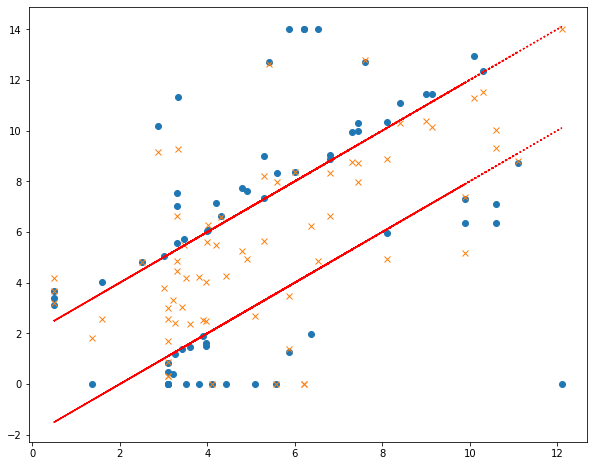

In [10]:
ids = list(outliers.keys())
x = np.array([outliers[id].exp for id in ids])
y1 = [outliers[id].ori for id in ids]
y2 = [outliers[id].new for id in ids]
plt.figure(figsize=(10, 8))
plt.plot(x, y1, 'o')
plt.plot(x, y2, "x")
plt.plot(x, x + 2, ':', color="r")
plt.plot(x, x - 2, ':', color="r")
plt.show()

### Improved by alternative structure (chain, NMR model or another pdb)
(bring back to < 2 pH unit)


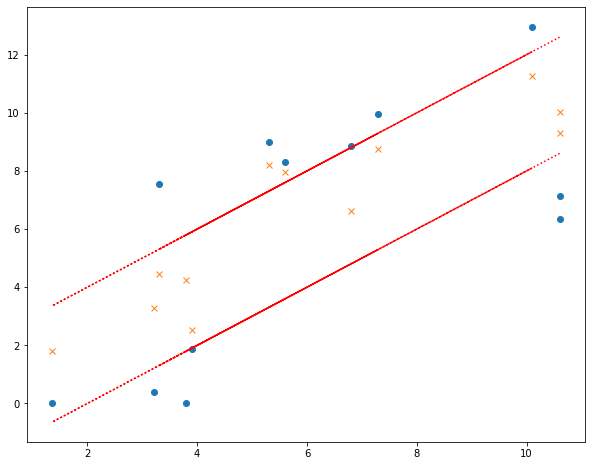

In [11]:

x = np.array([outliers[id].exp for id in ids if outliers[id].method == "alt"])
y1 = [outliers[id].ori for id in ids if outliers[id].method == "alt"]
y2 = [outliers[id].new for id in ids if outliers[id].method == "alt"]
plt.figure(figsize=(10, 8))
plt.plot(x, y1, 'o')
plt.plot(x, y2, "x")
plt.plot(x, x + 2, ':', color="r")
plt.plot(x, x - 2, ':', color="r")
plt.show()    


### Improved by rotamers


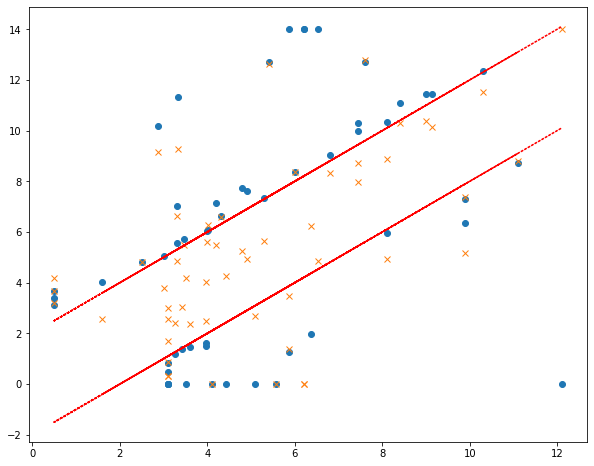

In [12]:
x = np.array([outliers[id].exp for id in ids if outliers[id].method == "rot"])
y1 = [outliers[id].ori for id in ids if outliers[id].method == "rot"]
y2 = [outliers[id].new for id in ids if outliers[id].method == "rot"]
plt.figure(figsize=(10, 8))
plt.plot(x, y1, 'o')
plt.plot(x, y2, "x")
plt.plot(x, x + 2, ':', color="r")
plt.plot(x, x - 2, ':', color="r")
plt.show()    

In [13]:
# Exceptions (CYD-CYD, HEME ligands, not in pdb)

n = 0
for id in ids:
    if outliers[id].method == "exc":
        print(id)
        n += 1

print(n, len(ids))
    

0 68
